## Li-ion Battery Problem

In this example we provide an implementation of a Li-ion battery model described in [@Popov]. The aim is to model how the concentration of Lithium (Li) ions and the electric potential vary over time in a battery as it discharges. 

Li-ion batteries are among the most popular types of rechargeable batteries available, having widespread use in phones, laptops and other portable devices. Due to the desire to improve their capacities, charge times and overall lifetime, they have been studied extensively by the scientific community [@Efendiev], [@Taralov], [@Taralov2], [@Latz].

In particular this model considers smaller scale behaviour of the system, by looking at an individual cell split into three parts, as described below.

We consider the following PDE.
\begin{eqnarray*}
\frac{\partial c}{\partial t} - \nabla \cdot (\textbf{A}(\textbf{u}) \nabla \textbf{u}) &=& 0 \quad \text{in } \Omega_a, \Omega_e \text{ and } \Omega_c \\
-\nabla \cdot ( \textbf{B}(\textbf{u}) \nabla \textbf{u}) &=& 0 \quad \text{in } \Omega_a, \Omega_e \text{ and } \Omega_c
\end{eqnarray*}
Where $\textbf{u} = (c, \phi)$, i.e. the concentration and electric potential, $\nabla \textbf{u}$ is the Jacobian, and $\textbf{A}(\textbf{u}), \textbf{B}(\textbf{u})$ are defined as

\begin{eqnarray*}
\textbf{A}(\textbf{u}) = \left(D_{e}(c, \phi) + \frac{R T}{F^2} \frac{t_{+}^2 (c) \kappa (c, \phi)}{c}, \kappa(c, \phi) \frac{t_+ (c)}{F}\right) \\
\textbf{B}(\textbf{u}) = \left( \frac{R T}{F} \frac{t_{+} \kappa(c, \phi)}{c}, \kappa(c, \phi) \right)
\end{eqnarray*}
where $F = 96485$ C mol$^{−1}$ is the Faraday constant, $R = 8.314$ J mol$^{−1}$ K$^{−1}$ is the gas constant and $T = 300$ K. $D_{e}$, $\kappa$ and $t_+$ depend on the domain and are defined as follows
\begin{eqnarray*}
\begin{array}{cccc}
\text{Domain} & D_e & \kappa & t_+ \\
\hline
\text{Anode} & 3.9 x 10^{-10} & 1.0 & 0 \\
\text{Electrolyte} & 7.5 x 10^{-7} & 0.002 & 0.2 \\
\text{Cathode} & 1.0 x 10^{-9} & 0.038 & 0
\end{array}
\end{eqnarray*}

The domain is given by a rectangle $\Omega$ split into three parts. $\Omega_a$ on left (anode), $\Omega_e$ in middle (electrolyte), $\Omega_c$ on right (cathode). The inner boundaries are $\Gamma_a = \bar \Omega_a \cap \bar \Omega_e$, $\Gamma_c = \bar \Omega_e \cap \bar \Omega_c$. The outer boundary is $\Gamma_{out}$. Note that $\textbf{u}$ is considered discontinuous across the inner boundaries, therefore we denote $\textbf{u}$ separately as $\textbf{u}_a, \textbf{u}_e$ and $\textbf{u}_c$ in each respective domain.

![The domain, a cell split into three parts](figures/battery.png)

For the outer boundary $\Gamma_{out}$ we set the Neumann conditions (no flux),
\begin{eqnarray*}
    (\textbf{A}(\textbf{u}) \nabla \textbf{u}) \cdot \textbf{n} = 0 \\
    (\textbf{B}(\textbf{u}) \nabla \textbf{u}) \cdot \textbf{n} = 0
\end{eqnarray*}
where $\textbf{n}$ is the unit normal pointing out the domain. Additionally on the inner boundaries $\Gamma_a$ we set the Neumann conditions,
\begin{eqnarray*}
    (\textbf{A}(\textbf{u}_a) \nabla \textbf{u}_a) \cdot \textbf{n} = -(\textbf{A}(\textbf{u}_e) \nabla \textbf{u}_e) \cdot \textbf{n} &=& N(\textbf{u}_{a}, \textbf{u}_e) \\
    (\textbf{B}(\textbf{u}_a) \nabla \textbf{u}_a) \cdot \textbf{n} = -(\textbf{B}(\textbf{u}_e) \nabla \textbf{u}_e) \cdot \textbf{n} &=& J(\textbf{u}_{a}, \textbf{u}_e)
\end{eqnarray*}
and similarly for $\Gamma_{c}$, where $N$ and $J$ are given as follows.
Recall that $\textbf{u}$ is considered discontinuous across the inner boundaries, therefore we denote $\textbf{u}$ separately as $\textbf{u}_a, \textbf{u}_e$ and $\textbf{u}_c$ in each respective domain. Thus we define $J$ and $N$ on $\Gamma_a$ (and equivalently on $\Gamma_c$) as follows 

\begin{gather*}
J(\textbf{u}_{a}, \textbf{u}_e) = k \left(\frac{c_e}{c^0_e} \right)^{\alpha_a} \left( \frac{c_a}{c^0_a} \right)^{\alpha_a} \left( 1 - \frac{c_a}{c_{a, max}} \right)^{\alpha_c} \left( \exp \left( \frac{\alpha_a F}{RT} \eta_a \right) - \exp \left( -\frac{\alpha_c F}{RT} \eta_a \right) \right) \\
N(\textbf{u}_{a}, \textbf{u}_e) = \frac{J(\textbf{u}_{a}, \textbf{u}_e)}{F}
\end{gather*}

where $\eta_a = \phi_a - \phi_e - U_{a,0}$ (and correspondingly $\eta_c = \phi_c - \phi_e - U_{c,0}$) and $\alpha_a + \alpha_c = 1$ are anodic and cathodic weightings respectively. Additionally $c^0$ (the initial condition for $c$), $c_{max}$ and $U_0$ are defined on each domain as follows

\begin{eqnarray*}
\begin{array}{cccc}
\text{Domain} & c^0 & c_{max} & U_0 \\
\hline
\text{Anode} & 0.002639 & 0.02639 & 0 \\
\text{Electrolyte} & 0.001 & - & - \\
\text{Cathode} & 0.020574 & 0.02286 & 0.001
\end{array}
\end{eqnarray*}

Note that the negative sign on the $\Omega_e$ side accounts for the fact the normal is inverted.

We will now write the weak form of the above PDE. Introducing a test function $\textbf{v} = (v_0, v_1)$ and integrating over the domain, we get,
\begin{eqnarray*}
\int_{\Omega} \frac{\partial c}{\partial t} v_0 - \nabla \cdot (\textbf{A}(\textbf{u}) \nabla \textbf{u}) v_0 \ dV = 0 \\
-\int_{\Omega}\nabla \cdot ( \textbf{B}(\textbf{u}) \nabla \textbf{u})v_1 \ dV = 0
\end{eqnarray*}
We then apply an implicit time discretisation, denoting the data from the previous time step by $\textbf{u}^0 = (c^0, \phi^0)$, the new time step by $\textbf{u}^{1} = (c^{1}, \phi^{1})$ and the size of the time step by $\tau$. This gives us the following.
\begin{eqnarray*}
\int_{\Omega} c^0 v_0 \ dV = \int_{\Omega} c^{1} v_0 - \tau \nabla \cdot (\textbf{A}(\textbf{u}^{1}) \nabla \textbf{u}^{1}) v_0 \ dV \\
-\int_{\Omega}\nabla \cdot ( \textbf{B}(\textbf{u}^{1}) \nabla \textbf{u}^1)v_1 \ dV = 0
\end{eqnarray*}
We now apply Green's identity to get rid of the divergence terms. Note that for the following, we will separate the PDE into 3 equations for each part of the domain, since the boundaries are different in each case. For $\Omega_a$, we get the following.
\begin{eqnarray*}
\int_{\Omega_a} c^0_a v_0 \ dV = \int_{\Omega_a} c^{1}_a v_0 + \tau (\textbf{A}(\textbf{u}^{1}_a) \nabla \textbf{u}^{1}_a) \cdot \nabla v_0 \ dV - \int_{\Gamma_a} \tau (\textbf{A}(\textbf{u}^{1}) \nabla \textbf{u}^{1}) \cdot \textbf{n} v_0 \ dS \\
\int_{\Omega_a} ( \textbf{B}(\textbf{u}^1_a) \nabla \textbf{u}^1_a)\cdot \nabla v_1 \ dV  - \int_{\Gamma_a} \tau (\textbf{B}(\textbf{u}^{1}) \nabla \textbf{u}^{1}) \cdot \textbf{n} v_1 \ dS = 0
\end{eqnarray*}
For $\Omega_e$,
\begin{eqnarray*}
\int_{\Omega_e} c^0_e v_0 \ dV = \int_{\Omega_e} c^{1}_e v_0 + \tau (\textbf{A}(\textbf{u}^{1}_e) \nabla \textbf{u}^{1}_e) \cdot \nabla v_0 \ dV - \int_{\Gamma_a \cup \Gamma_c} \tau (\textbf{A}(\textbf{u}^{1}) \nabla \textbf{u}^{1}) \cdot \textbf{n} v_0 \ dS \\
\int_{\Omega_e} ( \textbf{B}(\textbf{u}^1_e) \nabla \textbf{u}^1_e) \cdot \nabla v_1 \ dV - \int_{\Gamma_a \cup \Gamma_c} \tau (\textbf{B}(\textbf{u}^{1}) \nabla \textbf{u}^{1}) \cdot \textbf{n} v_1 \ dS = 0
\end{eqnarray*}
And for $\Omega_c$,
\begin{eqnarray*}
\int_{\Omega_c} c^0_c v_0 \ dV = \int_{\Omega_a} c^{1}_c v_0 + \tau (\textbf{A}(\textbf{u}^{1}_c) \nabla \textbf{u}^{1}_c) \cdot \nabla v_0 \ dV - \int_{\Gamma_c} \tau (\textbf{A}(\textbf{u}^{1}) \nabla \textbf{u}^{1}) \cdot \textbf{n} v_0 \ dS \\
\int_{\Omega_c} ( \textbf{B}(\textbf{u}^1_c) \nabla \textbf{u}^1_c)\cdot \nabla v_1 \ dV - \int_{\Gamma_c} \tau (\textbf{B}(\textbf{u}^{1}) \nabla \textbf{u}^{1}) \cdot \textbf{n} v_1 \ dS = 0
\end{eqnarray*}
Finally we apply our boundary conditions for the integrands with $dS$. For $\Omega_a,$
\begin{eqnarray*}
\int_{\Omega_a} c^0_a v_0 \ dV = \int_{\Omega_a} c^{1}_a v_0 + \tau (\textbf{A}(\textbf{u}^{1}_a) \nabla \textbf{u}^{1}_a) \cdot \nabla v_0 \ dV - \int_{\Gamma_a} \tau N(\textbf{u}^{1}_{a}, \textbf{u}^{1}_e) v_0 \ dS \\
\int_{\Omega_a} ( \textbf{B}(\textbf{u}^1_a) \nabla \textbf{u}^1_a)\cdot \nabla v_1 \ dV - \int_{\Gamma_a} J(\textbf{u}^1_{a}, \textbf{u}^1_e) v_1 \ dS = 0
\end{eqnarray*}
For $\Omega_e$,
\begin{eqnarray*}
\int_{\Omega_e} c^0_e v_0 \ dV= \int_{\Omega_e} c^{1}_e v_0 + \tau (\textbf{A}(\textbf{u}^{1}_e) \nabla \textbf{u}^{1}_e) \cdot \nabla v_0 \ dV + \int_{\Gamma_a} \tau N(\textbf{u}^{1}_a, \textbf{u}^{1}_e) v_0 \ dS+ \int_{\Gamma_c} \tau N(\textbf{u}^{1}_e, \textbf{u}^{1}_c) v_0 \ dS \\
\int_{\Omega_e} ( \textbf{B}(\textbf{u}^1_e) \nabla \textbf{u}^1_e) \cdot \nabla v_1 \ dV + \int_{\Gamma_a} J(\textbf{u}^1_{a}, \textbf{u}^1_e) v_1 \ dS + \int_{\Gamma_c} J(\textbf{u}^1_{e}, \textbf{u}^1_c) v_1 \ dS = 0
\end{eqnarray*}
And for $\Omega_c$,
\begin{eqnarray*}
\int_{\Omega_c} c^0_c v_0 \ dV = \int_{\Omega_a} c^{1}_c v_0 + \tau (\textbf{A}(\textbf{u}^{1}_c) \nabla \textbf{u}^{1}_c) \cdot \nabla v_0 \ dV - \tau \int_{\Gamma_c} N(\textbf{u}^{1}_e, \textbf{u}^{1}_c) v_0 \ dS \\
\int_{\Omega_c} ( \textbf{B}(\textbf{u}^1_c) \nabla \textbf{u}^1_c)\cdot \nabla v_1 \ dV - \int_{\Gamma_c} J(\textbf{u}^1_{e}, \textbf{u}^1_c) v_1 \ dS = 0
\end{eqnarray*}

We will now look at an implementation of the above in dune-fempy. First, let us import the necessary python modules.

In [1]:
from __future__ import print_function

import math
from ufl import *

import dune.ufl
import dune.fem

import dune.create as create
from dune.fem.view import filteredGridView

Let us define the parameters for the problem.

In [2]:
dune.fem.parameter.append("parameter")

# general parameters
dimDomain = 2 
dimRange = 2
order = 1  # order of FE space
numRefines = 1  # number of refinements of inital grid
timeStep = 50  # size of timeStep
maxIter = 20  # max number of solver iterations

# problem parameters (from battery paper)
R = 8.314
T = 300
F = 96485
t_plus = [0, 0.2, 0]
kappa = [1.0, 0.002, 0.038]
D_e = [3.9e-10, 7.5e-7, e-9]
c_init = [0.002639, 0.001, 0.020574]  # initial value for concentration
phi_init = [0, 0, 0]  # initial value for potential
c_max = [0.02639, None, 0.02286]
U_0 = [0, None, 0.001]
alpha_a = 0.5
alpha_c = 1 - alpha_a

In the usual way we define the variables in UFL.

In [3]:
# define u^1 = (c^1, phi^1) and v = (v_0, v_1)
space = dune.ufl.Space(dimDomain, dimRange)
u = TrialFunction(space)
v = TestFunction(space)

# define un = (c^0, phi^0), u_a is for storing u
# in Omega_a and so on for u_e and u_c
un = Coefficient(space)
u_a = Coefficient(space)
u_e = Coefficient(space)
u_c = Coefficient(space)
dt = Constant(space.cell())

Let us define the PDE and boundary conditions, starting with variables that we might want to modify.

In [4]:
# define A_1 and A_2 in PDE (for the Id, a = 0, e = 1, c = 2)
def A1(Id):
    return D_e[Id] + R*T/(F**2)*t_plus[Id]**2*kappa[Id]/u[0]
def A2(Id):
    return kappa[Id]*t_plus[Id]/F

# define B_1 and B_2 in PDE
def B1(Id):
    return R*T/F*t_plus[Id]*kappa[Id]/u[0]
def B2(Id):
    return kappa[Id]

# define Neumann boundary term J for inner boundaries
def J(uElec, uSolid):
    J1 = (uElec[0]/c_init[1])**alpha_a
    J2 = (uSolid[0]/c_init[0])**alpha_a
    J3 = (1 - uSolid[0]/c_max[0])**alpha_c
    J4 = (exp(alpha_a*F/(R*T)*(uSolid[1] - uElec[1] - U_0[0])) \
          - exp(-alpha_c*F/(R*T)*(uSolid[1] - uElec[1] - U_0[0])))
    return J1*J2*J3*J4

# define dirichlet conditions on the left and right boundaries
tmp_a = 0.000951 # these should be removed 
tmp_c = 0.018454 #
diric_a = as_vector([tmp_a, 2.5e-8])
diric_c = as_vector([tmp_c, 1.9e-2])

We continue defining the PDE and boundary conditions, this time with parts of the framework that should mostly remain the same.

In [5]:
# define J, N in Omega_a and Omega_c
J_s = J(u_e, u)
N_s = J_s/F
# define J, N in Omega_e on Gamma_a and Gamma_c respectively
J_ea = J(u, u_a)
N_ea = J_ea/F
J_ec = J(u, u_c)
N_ec = J_ec/F

# define the bilinear form's explicit part using B1, B2
def eq_ex(Id):
    ex = inner(un[0], v[0])*dx
    ex += inner(B1(Id)*grad(u[0]) + B2(Id)*grad(u[1]), grad(v[1]))*dx
    return ex
# define the implicit part using A1, A2
def eq_im(Id):
    im = (inner(u[0], v[0]))*dx 
    im += dt*inner(A1(Id)*grad(u[0]) + A2(Id)*grad(u[1]), grad(v[0]))*dx
    return im

# let's combine the bilinear forms with the BCs in each domain
a_ex = eq_ex(0) - J_s*v[1]*ds(4)
a_im = eq_im(0) - dt*N_s*v[0]*ds(4)
# same for Omega_e
e_ex = eq_ex(1) + J_ec*v[1]*ds(5)
e_im = eq_im(1) + dt*N_ea*v[0]*ds(3) + dt*N_ec*v[0]*ds(5)
# and Omega_c
c_ex = eq_ex(2) - J_s*v[1]*ds(4)
c_im = eq_im(2) - dt*N_s*v[0]*ds(4)

The remaining code involves setting up the FEM and is mostly independent of the problem paramaters, thus should not need to be changed.

Let us construct the three separate grids using a grid filter. We label the three domains by `3`, `4` and `5` to correspond with the inner BCs defined above.

In [6]:
def filter(e):
    if e.geometry.center[0] <= 0.2:
        return 3
    elif 0.2 <= e.geometry.center[0] <= 0.8:
        return 4
    elif 0.8 <= e.geometry.center[0]:
        return 5

unitcube = 'unitcube-' + str(dimDomain) + 'd.dgf'
#grid = create.view("adaptive", create.grid("OneD", unitcube))
grid = create.view("adaptive", create.grid("ALUCube", unitcube, dimgrid=dimDomain))
grid.hierarchicalGrid.globalRefine(numRefines)
anode       = filteredGridView(grid, filter, 3)
electrolyte = filteredGridView(grid, filter, 4)
cathode     = filteredGridView(grid, filter, 5)

We construct the FE spaces and the solutions.

In [7]:
space_a = create.space("Lagrange", anode, dimrange=dimRange, order=order)
space_e = create.space("Lagrange", electrolyte, dimrange=dimRange, order=order)
space_c = create.space("Lagrange", cathode, dimrange=dimRange, order=order)

solution_a   = space_a.interpolate(lambda x: [c_init[0], phi_init[0]], name="solution_a")
solution_a_n = solution_a.copy()
solution_a_n.assign( solution_a ) 
solution_e   = space_e.interpolate(lambda x: [c_init[1], phi_init[1]], name="solution_e")
solution_e_n = solution_e.copy()
solution_e_n.assign( solution_e ) 
solution_c   = space_c.interpolate(lambda x: [c_init[2], phi_init[2]], name="solution_c")
solution_c_n = solution_c.copy()
solution_c_n.assign( solution_c ) 

We construct the models and schemes.

In [8]:
# omega_a
model_a  = create.model("split", anode, a_ex == a_im, 
    dirichlet={6: diric_a}, coefficients={u_e: solution_e_n, un: solution_a_n})
model_a.setConstant(dt, timeStep)
scheme_a = create.scheme("galerkin", model_a, space_a)

# omega_e
model_e  = create.model("split", electrolyte, e_ex == e_im,
    coefficients={u_a: solution_a_n, u_c: solution_c_n, un: solution_e_n})
model_e.setConstant(dt, timeStep)
scheme_e = create.scheme("galerkin", model_e, space_e)

# omega_c
model_c  = create.model("split", cathode, c_ex == c_im,
    dirichlet={7: diric_c}, coefficients={u_e: solution_e_n, un: solution_c_n})
model_c.setConstant(dt, timeStep)
scheme_c = create.scheme("galerkin", model_c, space_c)

We define the method for plotting the solution. We do this using matplotlib and by plotting each solution to its own domain. We also calculate a `global_max` and `global_min` of all solutions to create the colour plot.

In [9]:
from numpy import amin, amax, linspace
import matplotlib
from matplotlib import pyplot
from IPython import display
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams['figure.figsize'] = [10, 5]

def matplot(grid, solution, sol2, sol3, a=False):
    triangulation = grid.triangulation()
    for p in range(2):
        pyplot.subplot(121 + p)
        pyplot.gca().set_aspect('equal')
        pyplot.gca().locator_params(tight=True, nbins=4)
        data = solution.pointData()
        data2 = sol2.pointData()
        data3 = sol3.pointData()
        global_min = min(amin(data[:,p]), amin(data2[:,p]), amin(data3[:,p])) - 1e-4
        global_max = max(amax(data[:,p]), amax(data2[:,p]), amax(data3[:,p])) + 1e-4
        if global_min != global_max:
            levels = linspace(global_min, global_max, 256)
            pyplot.tricontourf(triangulation, data[:,p], cmap=pyplot.cm.rainbow, levels=levels)
        else:
            pyplot.tricontourf(triangulation, data[:,p], cmap=pyplot.cm.rainbow)
        if a == True:
            pyplot.colorbar(shrink=0.725)

Finally we start the solving process over a loop. We plot the initial solution and the result after 20 steps, and we save each step to a paraview file.

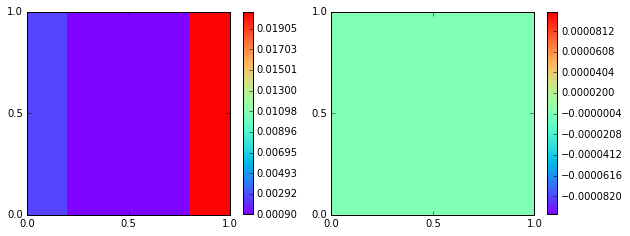

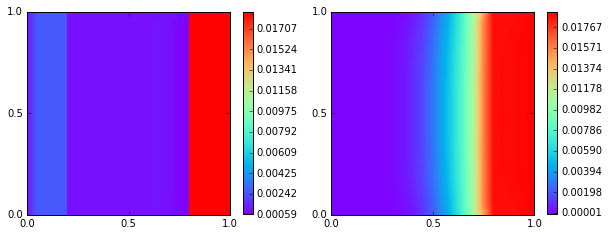

In [10]:
anode.writeVTK("battery_anode_", pointdata=[solution_a], number=0)
electrolyte.writeVTK("battery_electrolye_", pointdata=[solution_e], number=0)
cathode.writeVTK("battery_cathode_", pointdata=[solution_c], number=0)
matplot(anode, solution_a, solution_e, solution_c, a=True)
matplot(electrolyte, solution_e, solution_a, solution_c)
matplot(cathode, solution_c, solution_a, solution_e)
display.display(pyplot.gcf())
pyplot.close('all')
for i in range(1, 20):
    scheme_a.solve(target=solution_a)
    scheme_e.solve(target=solution_e)
    scheme_c.solve(target=solution_c)
    solution_a_n.assign(solution_a)
    solution_e_n.assign(solution_e)
    solution_c_n.assign(solution_c)
    anode.writeVTK("battery_anode_", pointdata=[solution_a], number=i)
    electrolyte.writeVTK("battery_electrolye_", pointdata=[solution_e], number=i)
    cathode.writeVTK("battery_cathode_", pointdata=[solution_c], number=i)
matplot(anode, solution_a, solution_e, solution_c, a=True)
matplot(electrolyte, solution_e, solution_a, solution_c)
matplot(cathode, solution_c, solution_a, solution_e)
display.display(pyplot.gcf())